# Fastcampus Data EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'FC_data1.xlsx'
data = pd.read_excel(url)

In [3]:
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634.0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500.0,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650.0,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000.0,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656.0,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  float64       
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  float64       
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

# 1 . 불필요한 값 제거 
tax_free_amount 컬럼 보안 이슈로 삭제, type 컬럼의 ORDER, TRANSACTION 속성, state컬럼의 PEDNING, CANCELLED, HIDDEN, DELETE 속성은 보안 이슈로 삭제

In [6]:
data_new = data.drop(['tax_free_amount'], axis=1) # Tax_free_amount 컬럼 제거
data_new.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634.0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500.0,NaN,NaN,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650.0,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000.0,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656.0,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,NaN,NaN,190900.0,NaN,CARD,NaN,2021-03-04
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [15]:

# cond = data_new.method == 'TRANS'  
# data_new[cond]

data_new['method'].value_counts() # Method 컬럼의 속성 카운트 출력

CARD            66380
VBANK            8540
POINT            8084
PROMOTION        4733
TRANS            2732
TRANSFER         1247
ONSITE            599
VOUCHER             5
B2B_CONTRACT        3
Name: method, dtype: int64

In [23]:
# 더 이상 사용되지 않는 기능으로 안내 받음, B2B 거래로 무시 요청
useless = data_new[data_new['type'].str.contains('ORDER')].index
data_new.drop(useless, inplace=True)
useless = data_new[data_new['type'].str.contains('TRANSACTION')].index
data_new.drop(useless, inplace=True
# 보안 상의 이유로 사용할 수 없는 4개의 속성 삭제             
useless = data_new[data_new['state'].str.contains('PENDING')].index
data_new.drop(useless, inplace=True)
useless = data_new[data_new['state'].str.contains('CANCELLED')].index
data_new.drop(useless, inplace=True)
useless = data_new[data_new['state'].str.contains('HIDDEN')].index
data_new.drop(useless, inplace=True)
useless = data_new[data_new['state'].str.contains('DELETED')].index
data_new.drop(useless, inplace=True)
data_new.head()



,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669.0,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671.0,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000.0,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
14,970676.0,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02


In [24]:
data_new['state'].value_counts() # state 속성 분석

COMPLETED    56724
REQUESTED       14
Name: state, dtype: int64

In [25]:
data_new['type'].value_counts() # type 속성 분석

PAYMENT    52916
REFUND      3822
Name: type, dtype: int64

In [26]:
# pg, method 컬럼의 NaN 값을 처리 후 payment_data라는 컬럼을 새로 만들어 둘을 합침
data_new['pg'].fillna('PG', inplace=True)
data_new['method'].fillna(' ', inplace=True)
data_new['payment_data'] = data_new['pg'] + ' ' + data_new['method']
data_new.head() 

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,payment_data
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,PG,CARD,NaN,2021-03-04,PG CARD
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PG,CARD,PPT/보고서,2019-11-14,PG CARD
8,970669.0,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,PG,CARD,영상 편집,2020-12-02,PG CARD
10,970671.0,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000.0,NaN,NaN,263000.0,PG,CARD,NaN,2020-11-27,PG CARD
14,970676.0,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,PG,CARD,프론트엔드 개발,2021-02-02,PG CARD


In [27]:
data_new['payment_data'].isna().sum()

0

In [28]:
# 필요없는 pg, method 속성 삭제
data_new.drop(['pg', 'method'], axis=1, inplace=True)
data_new.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,2021-03-04,PG CARD
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서,2019-11-14,PG CARD
8,970669.0,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,영상 편집,2020-12-02,PG CARD
10,970671.0,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000.0,NaN,NaN,263000.0,NaN,2020-11-27,PG CARD
14,970676.0,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02,PG CARD


In [30]:
data_new['payment_data'].unique()
data_backup = data_new # 전처리된 dataset 보관

# 2 가장 많이 판매된 Format 형식

In [32]:
data_new['format'].value_counts()

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
온라인            1
Name: format, dtype: int64

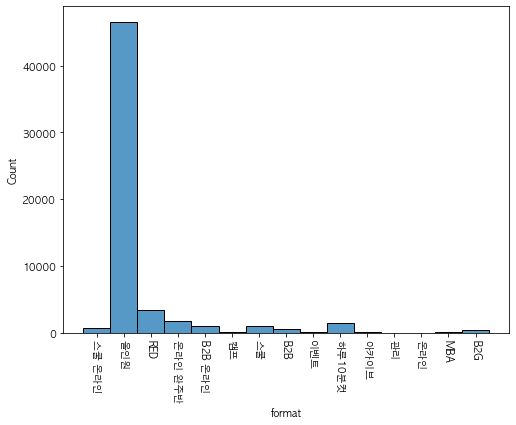

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data_new, x='format')
plt.xticks(rotation=-90, )
plt.show()

array(['PAYMENT', 'REFUND'], dtype=object)

# 3 구매 확정율 분석

In [39]:
data_new['type'].unique()

array(['PAYMENT', 'REFUND'], dtype=object)

# 1. 결제수단 분석

In [ ]:
payment_data = data_new
payment_data['pg'] = data['pg'].fillna('PG')
payment_data.head()

In [ ]:
payment_data['pg'].isna().sum()

In [ ]:
payment_data[payment_data['method'].isna()]['state'].unique()

In [ ]:
payment_data['method'].isna().sum()

In [ ]:
payment_data['method'].fillna('', inplace=True)
payment_data['method'].isna().sum()

In [ ]:
payment_data=payment_data['pg']+ ' '+ payment_data['method']


In [ ]:
data2 = data.copy()
data2['payment_data']=payment_data

In [ ]:
data2.drop(['pg', 'method'], axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(data2, x='payment_data')
plt.xticks(rotation=-90, fontsize=10)
plt.show()

# 2. course title 분석

In [ ]:
data2.head()

In [ ]:
how = {
    'course_title' : np.count_nonzero
}

data2.groupby(['category_title', 'subcategory_title', 'course_title']).count()

In [ ]:
sns.pairplot(data2)

In [ ]:
corr = data2.corr()
corr

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr, cmap='Blues', annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(200,8))
data2.groupby(['category_title', 'subcategory_title','course_title'])['id'].count().plot(kind='bar')
plt.xticks(rotation=-90)
plt.show()

# 3. Format 분석

In [ ]:
data2['format'].isna().sum()

In [ ]:
data2['format'].unique()

In [ ]:
data2[data2['format'].isna()]

In [ ]:
complete_transaction_amount = data2[data2['state'] == 'COMPLETED']['transaction_amount'].sum()
canceled_transaction_amount = data2[data2['state'] == 'CANCELLED']['transaction_amount'].sum()

In [ ]:
print(complete_transaction_amount, canceled_transaction_amount)

In [ ]:
how = {
    'transaction_amount' : np.sum
}
data2.groupby(data2['state']).agg(how)

In [ ]:
how = {
    'transaction_amount' : np.sum
}
data2.groupby(['type','state']).agg(how)

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
# ORDER 결제는 하지 않았지만 수강신청만 되어있는 상태
# CANCELLED 

# 4 가장 많이 팔린 Format

In [ ]:
data2[data2['format'].isna()]

In [ ]:
data3 = data2.copy()
data3['format'].dropna()

In [ ]:
data3 = data3.drop(data3.loc[data3['format'].isna()].index)
data3['format'].unique()

In [ ]:
how = {
    'customer_id' : np.count_nonzero,
    'transaction_amount' : np.sum,
    
}

data3.groupby(['format','category_title', 'state']).agg(how)

In [ ]:
data4 = data3.copy()
data4= data4.drop(data4.loc[data4['state'] != 'COMPLETED'].index)

In [ ]:
how = {
    'transaction_amount' : np.sum,
}
data4.groupby(['category_title', 'state']).agg(how)

In [ ]:
pd.options.display.max_rows = 200

pd.options.display.max_info_columns =200

pd.options.display.float_format = '{:,}'.format

# 4. type 컬럼에서 ORDER, TRANSACTION 삭제

In [ ]:
# 더 이상 사용되지 않는 기능으로 안내 받음, B2B 거래로 무시 요청
useless = data_new[data_new['type'].str.contains('ORDER')].index
data_new.drop(useless, inplace=True)

data_new.head()



In [ ]:
useless = data_new[data_new['type'].str.contains('TRANSACTION')].index
data_new.drop(useless, inplace=True)

data_new.info()

In [ ]:
useless = data_new[data_new['state'].str.contains('PENDING')].index
data_new.drop(useless, inplace=True)

data_new.info()

In [ ]:
useless = data_new[data_new['state'].str.contains('CANCELLED')].index
data_new.drop(useless, inplace=True)

data_new.info()

In [ ]:
useless = data_new[data_new['state'].str.contains('HIDDEN')].index
data_new.drop(useless, inplace=True)

data_new.info()

In [ ]:
useless = data_new[data_new['state'].str.contains('DELETE')].index
data_new.drop(useless, inplace=True)

data_new.info()

# 5. PG method 합치기

In [ ]:
data_new.head()

In [ ]:
data_new['pg'].fillna('PG', inplace=True)
data_new.head()

In [ ]:
data_new['method'] = data_new['method'].fillna('')

In [ ]:
data_new.drop(['pg', 'method'], axis=1, inplace=True)
data_new.head()

In [ ]:
data_new['payment_data'] = data_new['pg'] +' '+ data_new['method']
data_new.head()

In [ ]:
data_new['payment_data'].unique()

In [ ]:
data_new['payment_data'].isna().sum()